<a href="https://colab.research.google.com/github/HamzaAnjum15/StatTrack-Football/blob/main/Donnarumma%20VS%20Emi%20Martinez%20UCL%2025%20Comparison/Donnarumma_VS_Emi_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.6 MB/s eta 0:00:00


In [12]:
import matplotlib.pyplot as plt
!pip install highlight-text
from highlight_text import fig_text

from mplsoccer import PyPizza, FontManager


In [13]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

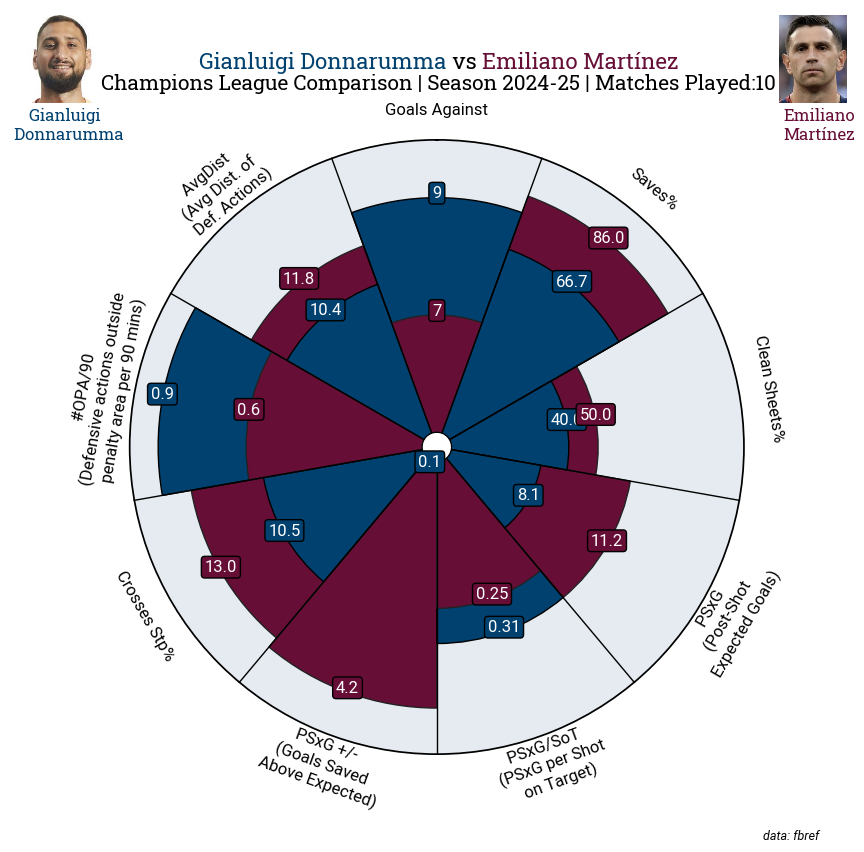

In [85]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg




# parameter and values list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
params = [
    "Goals Against", "Saves%", "Clean Sheets%", "PSxG \n (Post-Shot \n Expected Goals)", "PSxG/SoT \n (PSxG per Shot \n on Target)", "PSxG +/- \n (Goals Saved \n Above Expected)",
    "Crosses Stp%", "#OPA/90 \n (Defensive actions outside \n penalty area per 90 mins)", "AvgDist \n (Avg Dist. of \n Def. Actions)"
]
values = [9, 66.7, 40.0, 8.1, 0.31, 0.1, 10.5, 0.90, 10.4]    # for Donnarumma
values_2 = [7, 86.0, 50.0, 11.2, 0.25, 4.2, 13.0, 0.60, 11.8]  # for Emi Martinez



# minimum range value and maximum range value for parameters
min_range = [5, 0.0, 0.0,5.0, 0.0, 0.0, 5.0, 0.0, 5.0]
max_range = [10, 100.0, 100.0, 15.0, 0.50, 5.0, 15.0, 1.0, 15.0]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="white", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # passing comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.1,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#004170", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#670E36", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="black", fontsize=12, zorder=5,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#004170",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="white", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#670E36",
            boxstyle="round,pad=0.2", lw=1
        )
    )                            # values to be used when adding comparison-values
)

# add title
fig_text(
    0.515, 0.99, "<Gianluigi Donnarumma> vs <Emiliano Martínez>",
    size=16, fig=fig,
    highlight_textprops=[{"color": '#004170'}, {"color": '#670E36'}],
    ha="center", fontproperties=font_bold.prop, color="black"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Champions League Comparison | Season 2024-25 | Matches Played:10",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="black"
)

# add credits
CREDIT_1 = "data: fbref"

fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9,
    fontproperties=font_italic.prop, color="black",
    ha="right"
)


from PIL import Image
import urllib.request
import numpy as np

# Load Donnarumma Image from URL
url1 = "https://img.a.transfermarkt.technology/portrait/header/315858-1672304477.jpg?lm=1"
img1 = Image.open(urllib.request.urlopen(url1))
img1 = np.array(img1)

# Load Emi Martinez Image from URL
url2 = "https://img.a.transfermarkt.technology/portrait/header/111873-1668180824.jpg?lm=1"
img2 = Image.open(urllib.request.urlopen(url2))
img2 = np.array(img2)

imagebox1 = OffsetImage(img1, zoom=0.35)
imagebox2 = OffsetImage(img2, zoom=0.35)

ab1 = AnnotationBbox(imagebox1, (-0.11, 1.13), frameon=False, xycoords='axes fraction')
ab2 = AnnotationBbox(imagebox2, (1.11, 1.13), frameon=False, xycoords='axes fraction')

ax.add_artist(ab1)
ax.add_artist(ab2)

fig.text(0.05, 0.88, "Gianluigi \n Donnarumma", size=12, color="#004170",
         fontproperties=font_bold.prop, ha="center")

fig.text(0.99, 0.88, "Emiliano\nMartínez", size=12, color="#670E36",
         fontproperties=font_bold.prop, ha="center")


plt.savefig('Donnarumma VS Emi Martinez.png', dpi=300, bbox_inches='tight')

plt.show()

In [86]:
from google.colab import files
files.download('Donnarumma VS Emi Martinez.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>